# Bike Sharing

**Models used:** XGBRegressor, RandomForestRegressor, GradientBoostingRegressor

**Feature engineering:** one-hot encoding

**Feature selection:** True

**Feature scaling:** standardization (centering and scaling)

**Outlier identification:** based on LassoCV


## Описание

Вы разрабатываете модель для сервиса краткосрочной аренды велосипедов, у сервиса более 100 станций.

Сервис заинтересвон в развитии своих станции и оптимизации своей работы. Для оптимизации сервис хочет получать предсказание количества велосипедов на каждой станции, чтобы минимизироват простой технике и увеличить прибыль.

Вам предлагается набор данных от сервиса, который позволит оценить: количество велосипедов на станциях, время аренды, пиковые часы и часы простоя, как станции связаны между собой.

Оценка модели будет при помощи **RMSE**

## Regularized linear regressions

- Linear regresssion (no regularization)
- Ridge regression (L2-norm)
- LASSO regression (L1-norm)
- Elasticnet regression (с пенальти L1 и L2)
- Bayesian regression (L2 с Gaussian prior)
-  Least Angle regression (LAR)


### Linear Regression with Lasso regularization (L1 penalty)

In [120]:
alphas_lasso = [1e-6, 1e-5, 0.00005, 0.0001, 0.0005, 0.001, 0.01, 0.03, 0.06, 0.09, 0.1, 0.15] 
lassoCV = LassoCV(alphas=alphas_lasso)

In [121]:
lassoCV.fit(X_train, y_train)

Objective did not converge. You might want to increase the number of iterations. Duality gap: 109.50801116052025, tolerance: 10.732185281826558
Objective did not converge. You might want to increase the number of iterations. Duality gap: 781.787291941233, tolerance: 10.732185281826558
Objective did not converge. You might want to increase the number of iterations. Duality gap: 8032.243062067544, tolerance: 10.732185281826558
Objective did not converge. You might want to increase the number of iterations. Duality gap: 3188.234331300715, tolerance: 10.732185281826558
Objective did not converge. You might want to increase the number of iterations. Duality gap: 10526.011694224217, tolerance: 10.732185281826558
Objective did not converge. You might want to increase the number of iterations. Duality gap: 37779.00432792053, tolerance: 10.732185281826558
Objective did not converge. You might want to increase the number of iterations. Duality gap: 103.88225297855388, tolerance: 11.0283941291883

LassoCV(alphas=[1e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.01, 0.03, 0.06,
                0.09, 0.1, 0.15])

In [122]:
alpha = lassoCV.alpha_
print("Best Lasso alpha:", alpha)

Best Lasso alpha: 0.01


In [123]:
lasso = Lasso(alpha=0.0001)

In [124]:
lasso.fit(X_train, y_train)

Objective did not converge. You might want to increase the number of iterations. Duality gap: 13823.193661549158, tolerance: 13.657885271934218


Lasso(alpha=0.0001)

In [125]:
print("RMSE on Training set :", rmse_cv(lasso, X_train, y_train).mean())
print("RMSE on Test set :", rmse_cv(lasso, X_test, y_test).mean())

Objective did not converge. You might want to increase the number of iterations. Duality gap: 21648.759952877583, tolerance: 8.930810588918806
Objective did not converge. You might want to increase the number of iterations. Duality gap: 913.5532948892796, tolerance: 9.440297428449185
Objective did not converge. You might want to increase the number of iterations. Duality gap: 3658.608556777501, tolerance: 8.944597602739748


RMSE on Training set : 1.668602642994502


Objective did not converge. You might want to increase the number of iterations. Duality gap: 7943.591295832884, tolerance: 2.472385909980425
Objective did not converge. You might want to increase the number of iterations. Duality gap: 6430.350366293793, tolerance: 2.184931849315068


RMSE on Test set : 1.691934892751786


Objective did not converge. You might want to increase the number of iterations. Duality gap: 2946.868116514359, tolerance: 2.3622598336594782


In [126]:
predictions = lasso.predict(X_test)
print(explained_variance_score(predictions, y_test))

# Root Mean Squared Error
print("RMSE: %.3f"
      % math.sqrt(np.mean((lasso.predict(X_test) - y_test) ** 2)))

-911.8965396137979
RMSE: 1.693


In [127]:
scoring = 'neg_mean_squared_error'
kfold = KFold(n_splits=5, random_state=seed)
cv_results = cross_val_score(lasso,
                             X, y,
                             cv=kfold,
                             scoring=scoring)

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
Objective did not converge. You might want to increase the number of iterations. Duality gap: 12737.26575230241, tolerance: 13.865292692025559
Objective did not converge. You might want to increase the number of iterations. Duality gap: 4200.882268979083, tolerance: 13.540869159735804
Objective did not converge. You might want to increase the number of iterations. Duality gap: 16382.623961373785, tolerance: 13.63183170254406
Objective did not converge. You might want to increase the number of iterations. Duality gap: 24243.83132203442, tolerance: 14.028892692025556


In [128]:
print('RMSE: %.3f (%.3f)' % (cv_results.mean(), cv_results.std()))

RMSE: -2.803 (0.148)


In [129]:
pred_train = lasso.predict(X_train)
pred_test  = lasso.predict(X_test)

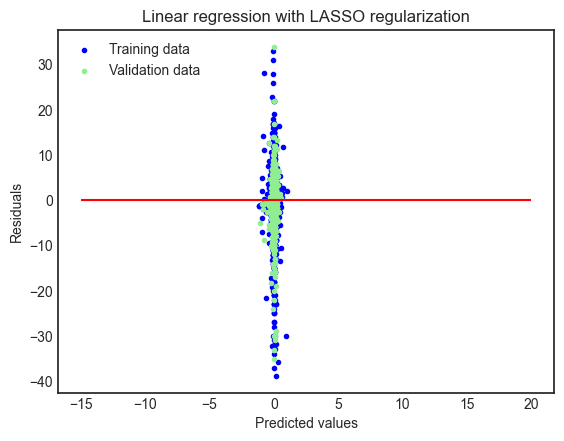

In [130]:
# Потери 
plt.scatter(pred_train, pred_train - y_train, 
            c = "blue", marker = ".", label = "Training data")
plt.scatter(pred_test, pred_test - y_test, 
            c = "lightgreen", marker = ".", label = "Validation data")
plt.title("Linear regression with LASSO regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = -15, xmax = 20, color = "red")
plt.show()

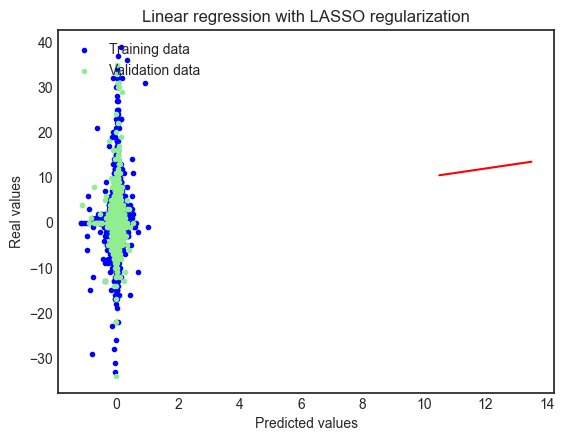

In [131]:
# Предикт
plt.scatter(pred_train, y_train, c = "blue", marker = ".", label = "Training data")
plt.scatter(pred_test, y_test, c = "lightgreen", marker = ".", label = "Validation data")
plt.title("Linear regression with LASSO regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

LASSO picked 34 features and eliminated the other 7 features


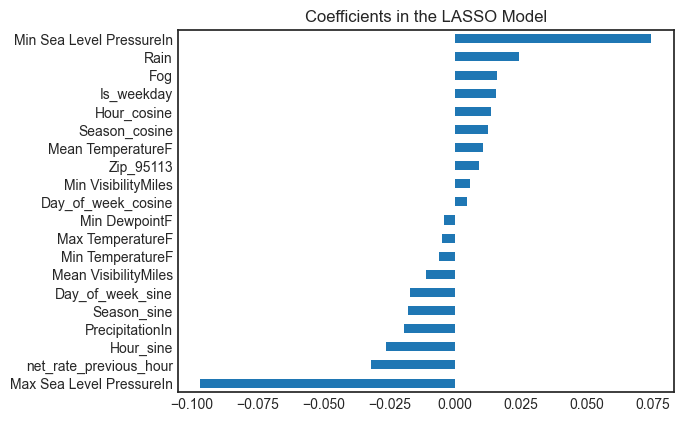

In [132]:
# Важность коэффициентов
coefs = pd.Series(lasso.coef_, index = X_train.columns)
print("LASSO picked " + str(sum(coefs != 0)) + \
      " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the LASSO Model")
plt.show()

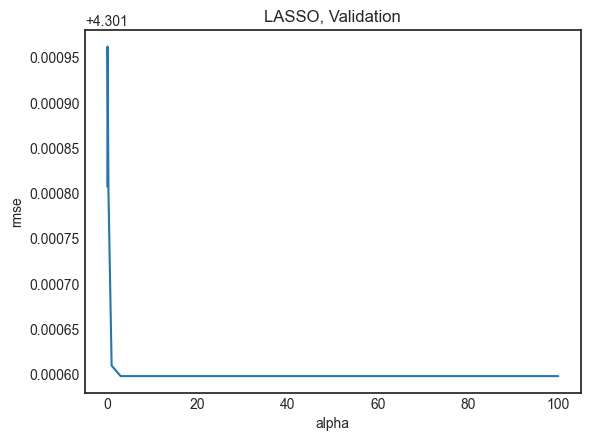


LASSO optimal regularization parameter alpha has rmse = 
4.301598306808104


In [133]:
alphas = [0.05, 0.1, 0.3, 1, 3, 4, 10, 15, 30, 50, 75, 100]

cv_lasso = [rmse_cv(Lasso(alpha=alpha), X_train, y_train).mean() 
            for alpha in alphas
           ]

cv_lasso = pd.Series(np.expm1(cv_lasso), index=alphas)
cv_lasso = pd.Series(cv_lasso, index=alphas)

plt.figure()
cv_lasso.plot(title = "LASSO, Validation")
plt.xlabel('alpha')
plt.ylabel('rmse')
plt.show()
print("\nLASSO optimal regularization parameter alpha has rmse = ")
print(cv_lasso.min())

### Linear Regression with Ridge regularization (L2 penalty)

In [135]:
# Linear Regression with Ridge regularization 
ridgeCV = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])

In [136]:
ridgeCV.fit(X_train, y_train)

RidgeCV(alphas=array([1.e-02, 3.e-02, 6.e-02, 1.e-01, 3.e-01, 6.e-01, 1.e+00, 3.e+00,
       6.e+00, 1.e+01, 3.e+01, 6.e+01]))

In [137]:
alpha = ridgeCV.alpha_
print("Best alpha :", alpha)

Best alpha : 60.0


In [138]:
ridge = Ridge(alpha=60.0)

In [139]:
ridge.fit(X_train, y_train)

Ridge(alpha=60.0)

In [140]:
print("RMSE on Training set :", rmse_cv(ridge, X_train, y_train).mean())
print("RMSE on Test set :", rmse_cv(ridge, X_test, y_test).mean())

RMSE on Training set : 1.6686170913892227
RMSE on Test set : 1.6918697151510749


In [141]:
predictions = ridge.predict(X_test)
print(explained_variance_score(predictions, y_test))

# Calculate the Root Mean Squared Error
print("RMSE: %.3f"
      % math.sqrt(np.mean((ridge.predict(X_test) - y_test) ** 2)))

-899.4647717571074
RMSE: 1.693


In [142]:
scoring = 'neg_mean_squared_error'
kfold = KFold(n_splits=5, random_state=seed)
cv_results = cross_val_score(ridge,
                             X, y,
                             cv=kfold,
                             scoring=scoring)

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.


In [143]:
print('RMSE: %.3f (%.3f)' % (cv_results.mean(), cv_results.std()))

RMSE: -2.803 (0.148)


In [144]:
pred_train = ridge.predict(X_train)
pred_test  = ridge.predict(X_test)

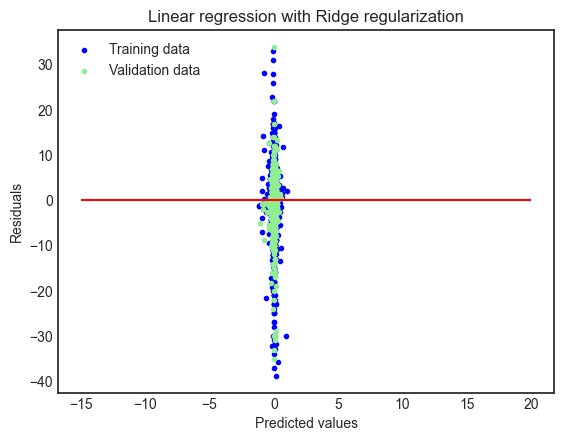

In [145]:
# Потери
plt.scatter(pred_train, pred_train - y_train, 
            c = "blue", marker = ".", label = "Training data")
plt.scatter(pred_test, pred_test - y_test, 
            c = "lightgreen", marker = ".", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = -15, xmax = 20, color = "red")
plt.show()

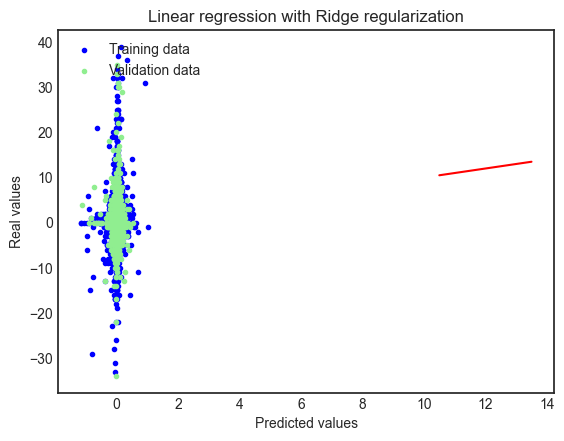

In [146]:
# Предсказание 
plt.scatter(pred_train, y_train, c = "blue", marker = ".", label = "Training data")
plt.scatter(pred_test, y_test, c = "lightgreen", marker = ".", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

Ridge picked 41 features and eliminated the other 0 features


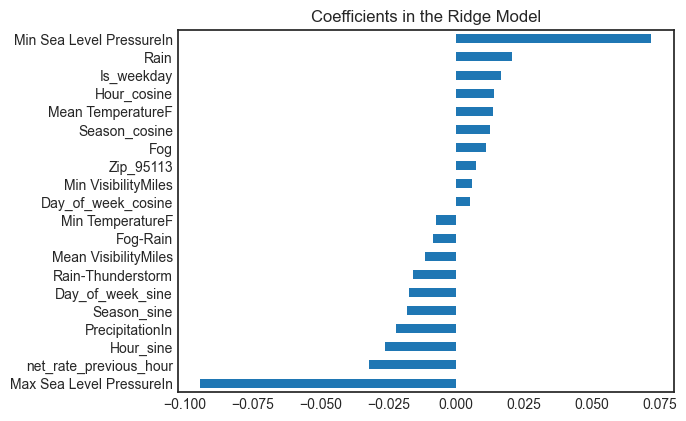

In [147]:
# Важность коэффициентов
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + \
      " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

### Linear Regression with ElasticNet regularization (L1 and L2 penalty)

In [148]:
elasticNetCV = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)

In [149]:
elasticNetCV.fit(X_train, y_train)

ElasticNetCV(alphas=[0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03,
                     0.06, 0.1, 0.3, 0.6, 1, 3, 6],
             cv=10, l1_ratio=[0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
             max_iter=50000)

In [150]:
alpha = elasticNetCV.alpha_
ratio = elasticNetCV.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

Best l1_ratio : 0.6
Best alpha : 0.03


In [151]:
elasticNet = ElasticNet(l1_ratio=0.7,alpha=0.0003)

In [152]:
elasticNet.fit(X_train, y_train)

Objective did not converge. You might want to increase the number of iterations. Duality gap: 3203.5201641629974, tolerance: 13.657885271934218


ElasticNet(alpha=0.0003, l1_ratio=0.7)

In [153]:
print("RMSE on Training set :", rmse_cv(elasticNet, X_train, y_train).mean())
print("Test set :", rmse_cv(elasticNet, X_test, y_test).mean())

Objective did not converge. You might want to increase the number of iterations. Duality gap: 10675.791877707896, tolerance: 8.930810588918806


RMSE on Training set : 1.6685662017531475


Objective did not converge. You might want to increase the number of iterations. Duality gap: 5017.315630493005, tolerance: 2.472385909980425
Objective did not converge. You might want to increase the number of iterations. Duality gap: 4349.376943729881, tolerance: 2.184931849315068


Test set : 1.6919091326562785


Objective did not converge. You might want to increase the number of iterations. Duality gap: 944.8842080352297, tolerance: 2.3622598336594782


In [154]:
predictions = elasticNet.predict(X_test)
print(explained_variance_score(predictions, y_test))

# Root Mean Squared Error
print("RMSE: %.3f"
      % math.sqrt(np.mean((elasticNet.predict(X_test) - y_test) ** 2)))

-932.0275636983074
RMSE: 1.693


In [155]:
scoring = 'neg_mean_squared_error'
kfold = KFold(n_splits=5, random_state=seed)
cv_results = cross_val_score(elasticNet,
                             X, y,
                             cv=kfold,
                             scoring=scoring)

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
Objective did not converge. You might want to increase the number of iterations. Duality gap: 2061.867989080216, tolerance: 13.865292692025559
Objective did not converge. You might want to increase the number of iterations. Duality gap: 3904.2030775439343, tolerance: 13.63183170254406
Objective did not converge. You might want to increase the number of iterations. Duality gap: 531.866733472023, tolerance: 13.607117757257118
Objective did not converge. You might want to increase the number of iterations. Duality gap: 7673.141247533364, tolerance: 14.028892692025556


In [156]:
print('RMSE: %.3f (%.3f)' % (cv_results.mean(), cv_results.std()))

RMSE: -2.803 (0.148)


In [157]:
pred_train = elasticNet.predict(X_train)
pred_test  = elasticNet.predict(X_test)

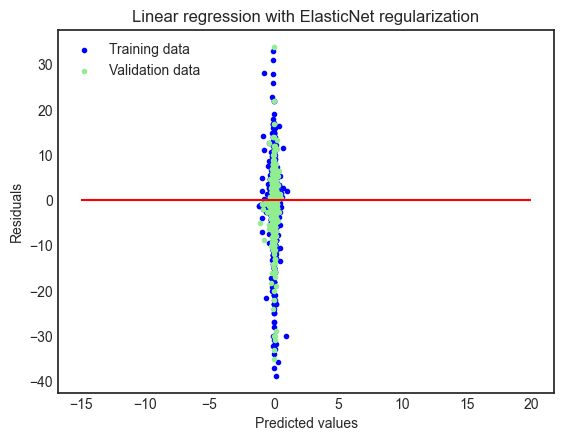

In [158]:
plt.scatter(pred_train, pred_train - y_train, c = "blue", marker = ".", label = "Training data")
plt.scatter(pred_test, pred_test - y_test, c = "lightgreen", marker = ".", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = -15, xmax = 20, color = "red")
plt.show()

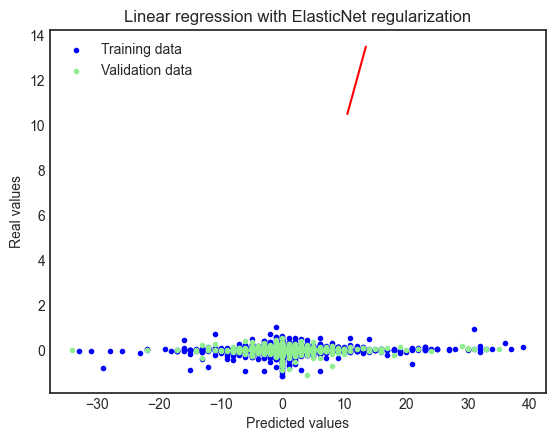

In [159]:
plt.scatter(y_train, pred_train, c = "blue", marker = ".", label = "Training data")
plt.scatter(y_test, pred_test, c = "lightgreen", marker = ".", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

ElasticNet picked 34 features and eliminated the other 7 features


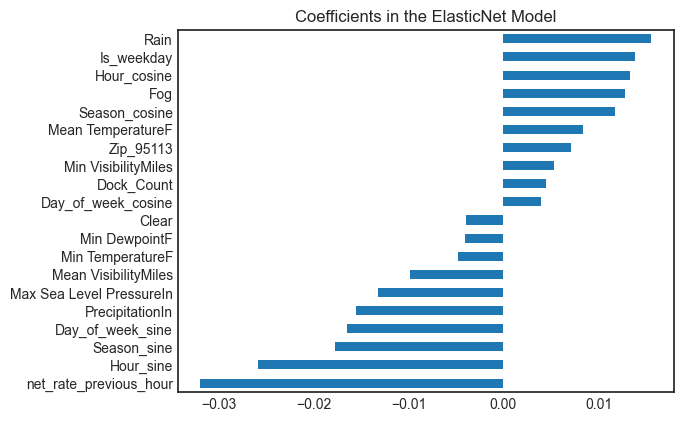

In [160]:
# Важность коэффициентов
coefs = pd.Series(elasticNet.coef_, index = X_train.columns)
print("ElasticNet picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                       coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the ElasticNet Model")
plt.show()

### Linear regression with Bayesian Ridge regularization

In [161]:
bayes = BayesianRidge()

In [162]:
bayes.fit(X_train, y_train)

BayesianRidge()

In [163]:
predictions = bayes.predict(X_test)
print(explained_variance_score(predictions,y_test))

-25315.926114156027


In [164]:
# Root Mean Squared Error
print("RMSE: %.2f"
      % math.sqrt(np.mean((bayes.predict(X_test) - y_test) ** 2)))

RMSE: 1.69


In [165]:
predictions = bayes.predict(X_test)
print(explained_variance_score(predictions, y_test))

# Root Mean Squared Error
print("RMSE: %.3f"
      % math.sqrt(np.mean((bayes.predict(X_test) - y_test) ** 2)))

-25315.926114156027
RMSE: 1.692


In [166]:
scoring = 'neg_mean_squared_error'
kfold = KFold(n_splits=5, random_state=seed)
cv_results = cross_val_score(bayes,
                             X, y,
                             cv=kfold,
                             scoring=scoring)

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.


In [167]:
print('RMSE: %.3f (%.3f)' % (cv_results.mean(), cv_results.std()))

RMSE: -2.800 (0.149)


In [168]:
pred_train = bayes.predict(X_train)
pred_test  = bayes.predict(X_test)

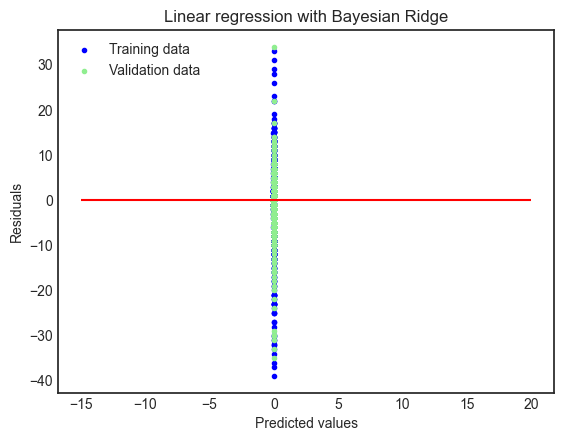

In [169]:
plt.scatter(pred_train, pred_train - y_train, c = "blue", marker = ".", label = "Training data")
plt.scatter(pred_test, pred_test - y_test, c = "lightgreen", marker = ".", label = "Validation data")
plt.title("Linear regression with Bayesian Ridge")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = -15, xmax = 20, color = "red")
plt.show()

Text(0.5, 1.0, 'Residual plot in Bayesian Regression')

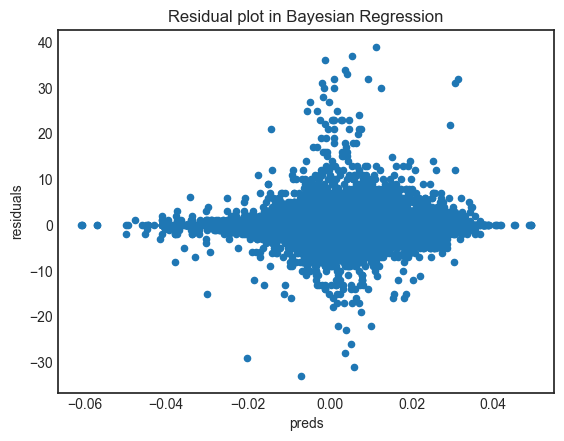

In [170]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":bayes.predict(X_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Bayesian Regression")

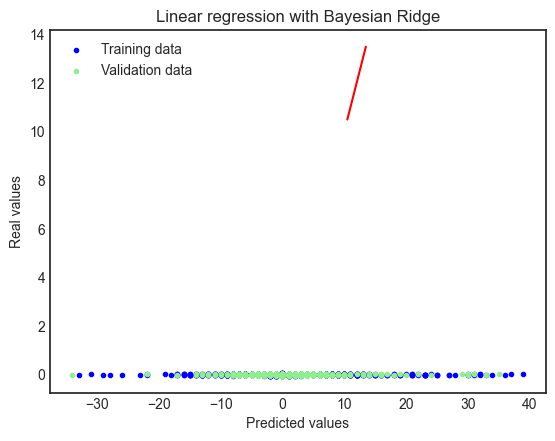

In [171]:
plt.scatter(y_train, pred_train, c = "blue", marker = ".", label = "Training data")
plt.scatter(y_test, pred_test, c = "lightgreen", marker = ".", label = "Validation data")
plt.title("Linear regression with Bayesian Ridge")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

Bayesian picked 41 features and eliminated the other 0 features


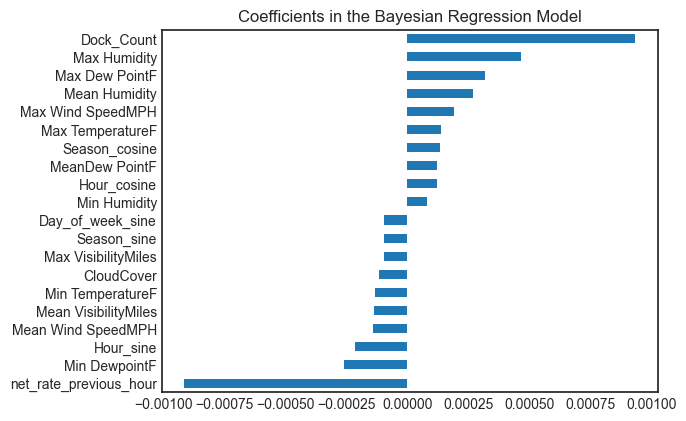

In [172]:
# Важность коэффициентов
coefs = pd.Series(bayes.coef_, index = X_train.columns)
print("Bayesian picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                       coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Bayesian Regression Model")
plt.show()

In [177]:
col={'Train Error':pred_train,'Test Error':pred_train}
models=['Ridge Regression',
        'Linear Regression','Elastic Net regression',
        'Bayesian Regression',
        'Random Forest','Gradient Boosting', 
       ]
df_comparison=pd.DataFrame(data=col)#, index=models)
df_comparison.head(5)

,Train Error,Test Error
0,0.013809,0.013809
1,-0.005808,-0.005808
2,0.005497,0.005497
3,0.005117,0.005117
4,0.011285,0.011285


<AxesSubplot:>

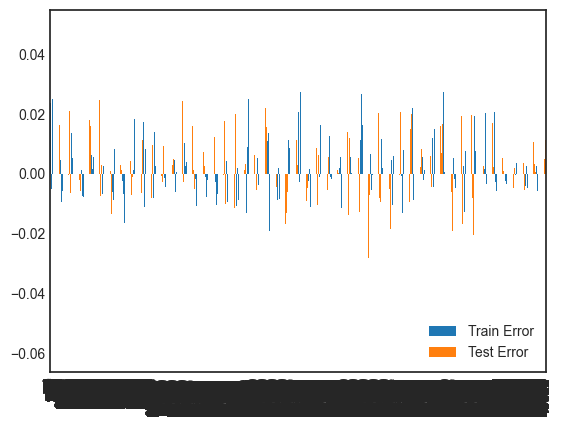

In [178]:
df_comparison.plot(kind='bar')

### Least Angle regression (LARs)

In [179]:
lars = Lars(n_nonzero_coefs=50)

In [180]:
lars.fit(X_train, y_train)

Regressors in active set degenerate. Dropping a regressor, after 36 iterations, i.e. alpha=8.838e-07, with an active set of 34 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 38 iterations, i.e. alpha=6.419e-07, with an active set of 36 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 40 iterations, i.e. alpha=2.805e-07, with an active set of 37 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 42 iterations, i.e. alpha=2.213e-07, with an active set of 38 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.


Lars(n_nonzero_coefs=50)

In [181]:
print("RMSE on Training set :", rmse_cv(lars, X_train, y_train).mean())
print("Test set :", rmse_cv(lars, X_test, y_test).mean())

Regressors in active set degenerate. Dropping a regressor, after 42 iterations, i.e. alpha=1.160e-06, with an active set of 39 regressors, and the smallest cholesky pivot element being 8.025e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 42 iterations, i.e. alpha=1.083e-06, with an active set of 39 regressors, and the smallest cholesky pivot element being 8.025e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 38 iterations, i.e. alpha=1.855e-05, with an active set of 36 regressors, and the smallest cholesky pivot element being 4.942e-08. Reduce max_iter or increase eps parameters.


RMSE on Training set : 1.6688790392351178
Test set : 1.7083850399274516


Regressors in active set degenerate. Dropping a regressor, after 40 iterations, i.e. alpha=1.392e-05, with an active set of 37 regressors, and the smallest cholesky pivot element being 4.942e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 41 iterations, i.e. alpha=5.187e-06, with an active set of 38 regressors, and the smallest cholesky pivot element being 5.771e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 41 iterations, i.e. alpha=2.283e-06, with an active set of 38 regressors, and the smallest cholesky pivot element being 4.942e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 42 iterations, i.e. alpha=1.343e-06, with an active set of 39 regressors, and the smallest cholesky pivot element being 4.942e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dro

In [182]:
predictions = lars.predict(X_test)
print(explained_variance_score(predictions, y_test))

# Root Mean Squared Error
print("RMSE: %.3f"
      % math.sqrt(np.mean((lars.predict(X_test) - y_test) ** 2)))

-841.4367877319426
RMSE: 1.693


In [183]:
scoring = 'neg_mean_squared_error'
kfold = KFold(n_splits=5, random_state=seed)
cv_results = cross_val_score(lars,
                             X, y,
                             cv=kfold,
                             scoring=scoring)

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
Regressors in active set degenerate. Dropping a regressor, after 32 iterations, i.e. alpha=4.350e-06, with an active set of 31 regressors, and the smallest cholesky pivot element being 5.475e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 34 iterations, i.e. alpha=2.964e-06, with an active set of 33 regressors, and the smallest cholesky pivot element being 5.475e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 34 iterations, i.e. alpha=2.869e-06, with an active set of 33 regressors, and the smallest cholesky pivot element being 5.475e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 36 iterations, i.e. alpha=1.972e-06, with an a

In [184]:
print('RMSE: %.3f (%.3f)' % (cv_results.mean(), cv_results.std()))

RMSE: -2.804 (0.148)


In [185]:
pred_train = lars.predict(X_train)
pred_test  = lars.predict(X_test)

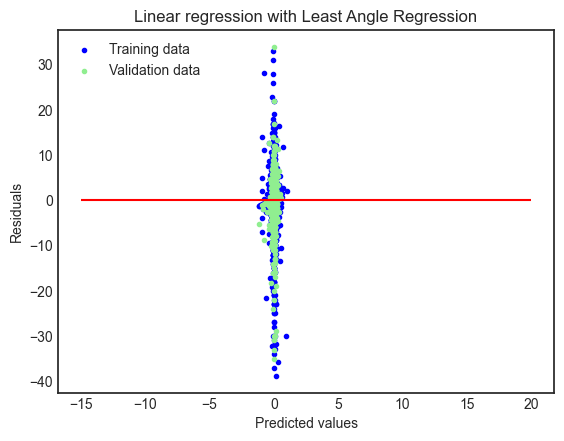

In [186]:
plt.scatter(pred_train, pred_train - y_train, 
            c = "blue", marker = ".", label = "Training data")
plt.scatter(pred_test, pred_test - y_test, 
            c = "lightgreen", marker = ".", label = "Validation data")
plt.title("Linear regression with Least Angle Regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = -15, xmax = 20, color = "red")
plt.show()

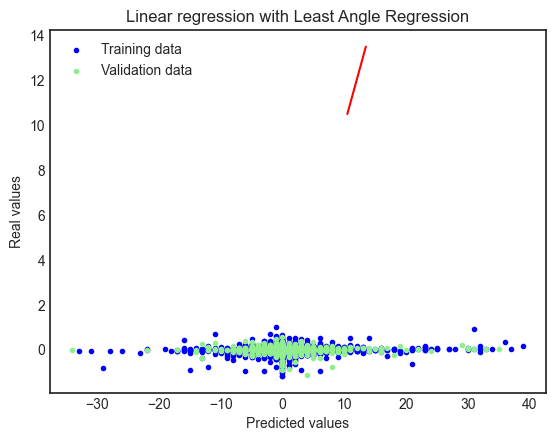

In [187]:
plt.scatter(y_train, pred_train, c = "blue", marker = ".", label = "Training data")
plt.scatter(y_test, pred_test, c = "lightgreen", marker = ".", label = "Validation data")
plt.title("Linear regression with Least Angle Regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

LARS picked 38 features and eliminated the other 3 features


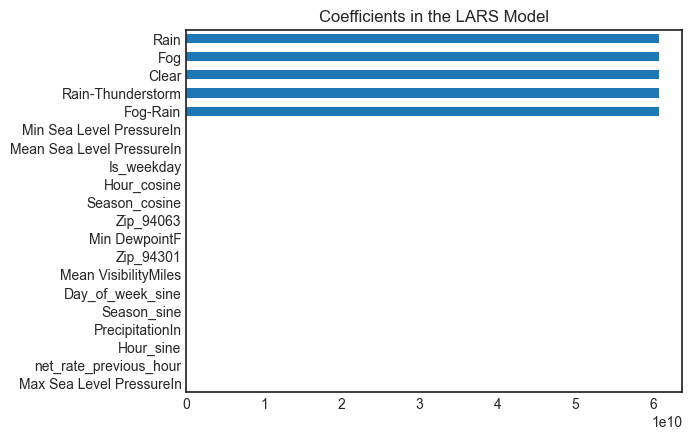

In [188]:
# Важность коэффициентов
coefs = pd.Series(lars.coef_, index = X_train.columns)
print("LARS picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the LARS Model")
plt.show()

## Tree-based regression

### Random Forest Regressor

In [189]:
rfr = RandomForestRegressor(n_jobs=1, criterion='mse', random_state=42)

In [190]:
rfr.fit(X_train, y_train)

RandomForestRegressor(n_jobs=1, random_state=42)

In [191]:
predictions = rfr.predict(X_test)
print(explained_variance_score(predictions,y_test))

-2.6205157434070494


In [192]:
# Root Mean Squared Error
print("RMSE: %.2f"
      % math.sqrt(np.mean((rfr.predict(X_test) - y_test) ** 2)))

RMSE: 1.76


In [193]:
scoring = 'neg_mean_squared_error'
kfold = KFold(n_splits=5, random_state=seed)
cv_results = cross_val_score(rfr,
                             X, y,
                             cv=kfold,
                             scoring=scoring)

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.


In [194]:
print('RMSE: %.3f (%.3f)' % (cv_results.mean(), cv_results.std()))

RMSE: -2.982 (0.202)


In [195]:
pred_train = rfr.predict(X_train)
pred_test  = rfr.predict(X_test)

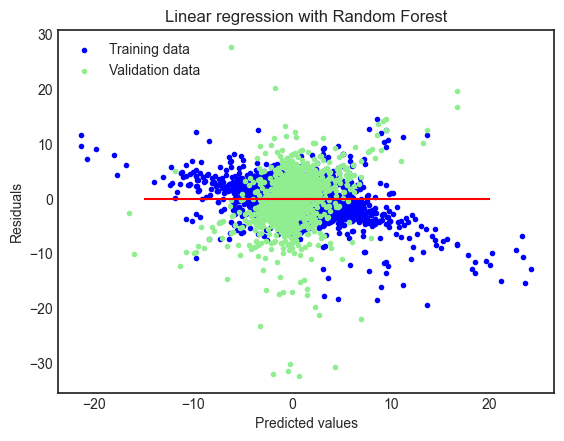

In [196]:
plt.scatter(pred_train, pred_train - y_train, 
            c = "blue", marker = ".", label = "Training data")
plt.scatter(pred_test, pred_test - y_test, 
            c = "lightgreen", marker = ".", label = "Validation data")
plt.title("Linear regression with Random Forest")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = -15, xmax = 20, color = "red")
plt.show()

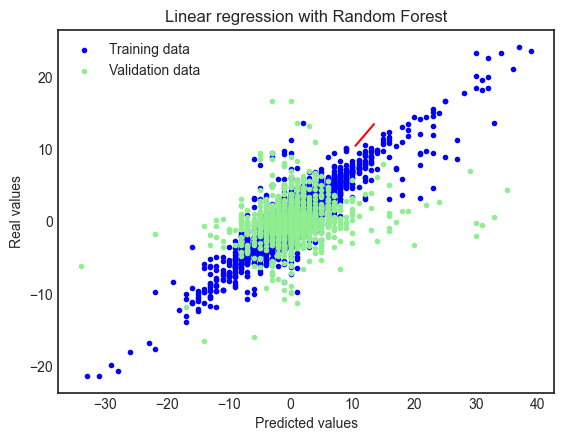

In [197]:
plt.scatter(y_train, pred_train, c = "blue", marker = ".", label = "Training data")
plt.scatter(y_test, pred_test, c = "lightgreen", marker = ".", label = "Validation data")
plt.title("Linear regression with Random Forest")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

RandomForest picked 41 features and eliminated the other 0 features


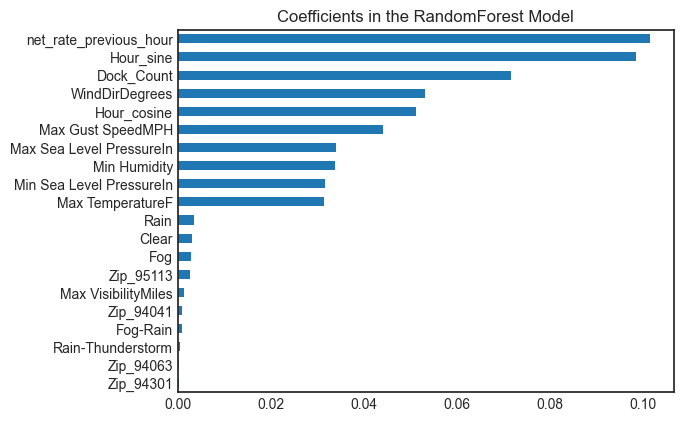

In [198]:
# Важность коэффициентов
coefs = pd.Series(rfr.feature_importances_, index = X_train.columns)
print("RandomForest picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                       coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the RandomForest Model")
plt.show()

In [199]:
lassolarsic = LassoLarsIC()

In [200]:
lassolarsic.fit(X_train, y_train)

LassoLarsIC()

In [201]:
predictions = lassolarsic.predict(X_test)
print(explained_variance_score(predictions,y_test))

-2535.428014092965


In [202]:
# Calculate the Root Mean Squared Error
print("RMSE: %.2f"
      % math.sqrt(np.mean((lassolarsic.predict(X_test) - y_test) ** 2)))

RMSE: 1.69


In [203]:
scoring = 'neg_mean_squared_error'
kfold = KFold(n_splits=5, random_state=seed)
cv_results = cross_val_score(lassolarsic,
                             X, y,
                             cv=kfold,
                             scoring=scoring)

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.


In [204]:
print('RMSE: %.3f (%.3f)' % (cv_results.mean(), cv_results.std()))

RMSE: -2.801 (0.148)


In [205]:
pred_train = lassolarsic.predict(X_train)
pred_test  = lassolarsic.predict(X_test)

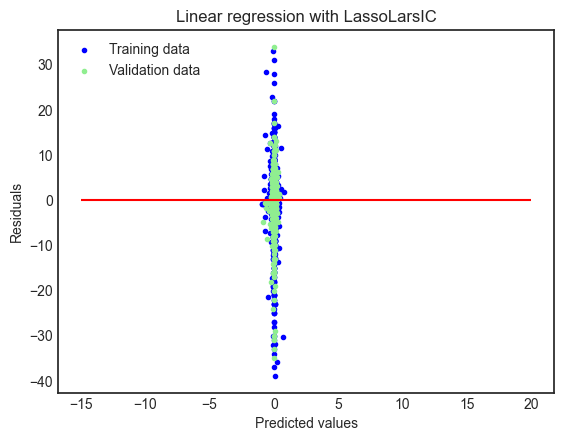

In [206]:
plt.scatter(pred_train, pred_train - y_train, 
            c = "blue", marker = ".", label = "Training data")
plt.scatter(pred_test, pred_test - y_test, 
            c = "lightgreen", marker = ".", label = "Validation data")
plt.title("Linear regression with LassoLarsIC")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = -15, xmax = 20, color = "red")
plt.show()

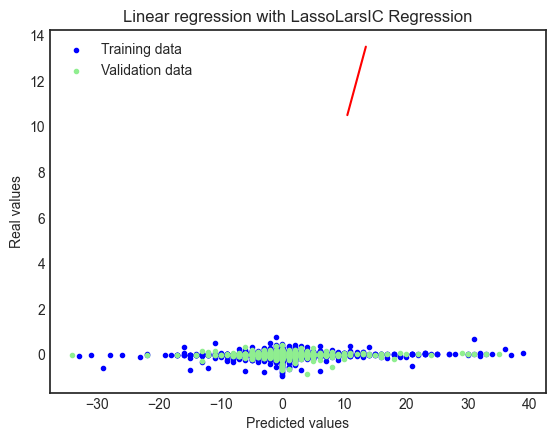

In [207]:
plt.scatter(y_train, pred_train, c = "blue", marker = ".", label = "Training data")
plt.scatter(y_test, pred_test, c = "lightgreen", marker = ".", label = "Validation data")
plt.title("Linear regression with LassoLarsIC Regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

LassoLarsIC picked 4 features and eliminated the other 37 features


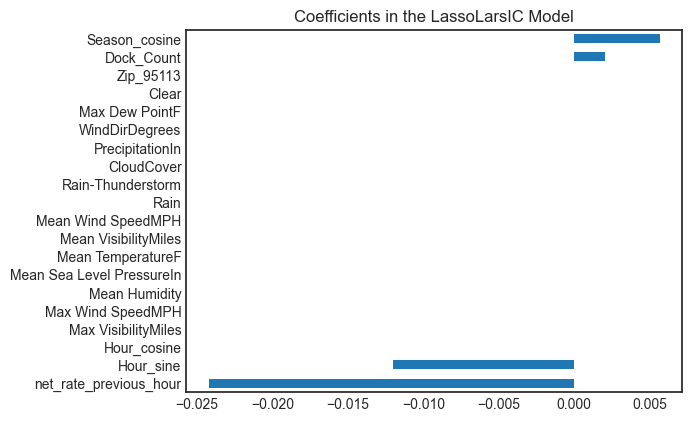

In [208]:
# Важность коэффициентов
coefs = pd.Series(lassolarsic.coef_, index = X_train.columns)
print("LassoLarsIC picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                       coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the LassoLarsIC Model")
plt.show()

### Gradient Boosting Regressor

In [209]:
##Gradient Boosting Regressor

# nested cross-validation
gbr = GradientBoostingRegressor(criterion='friedman_mse', 
                                subsample=0.80,
                                max_features='auto',
                                random_state=42)

In [210]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(max_features='auto', random_state=42, subsample=0.8)

In [211]:
predictions = gbr.predict(X_test)
print(explained_variance_score(predictions,y_test))

-31.298493013986786


In [212]:
# Root Mean Squared Error
print("RMSE: %.2f"
      % math.sqrt(np.mean((gbr.predict(X_test) - y_test) ** 2)))

RMSE: 1.68


In [213]:
scoring = 'neg_mean_squared_error'
kfold = KFold(n_splits=5, random_state=seed)
cv_results = cross_val_score(gbr,
                             X, y,
                             cv=kfold,
                             scoring=scoring)

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.


In [214]:
print('RMSE: %.3f (%.3f)' % (cv_results.mean(), cv_results.std()))

RMSE: -2.736 (0.136)


In [215]:
pred_train = gbr.predict(X_train)
pred_test  = gbr.predict(X_test)

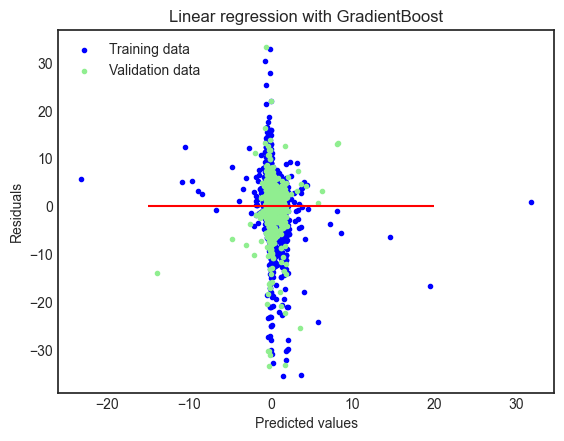

In [216]:

plt.scatter(pred_train, pred_train - y_train, 
            c = "blue", marker = ".", label = "Training data")
plt.scatter(pred_test, pred_test - y_test, 
            c = "lightgreen", marker = ".", label = "Validation data")
plt.title("Linear regression with GradientBoost")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = -15, xmax = 20, color = "red")
plt.show()

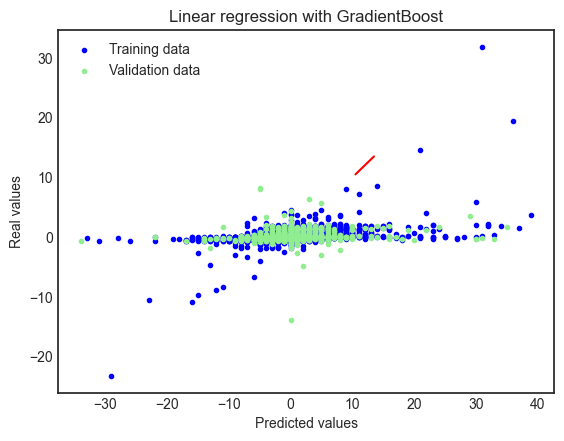

In [217]:

plt.scatter(y_train, pred_train, c = "blue", marker = ".", label = "Training data")
plt.scatter(y_test, pred_test, c = "lightgreen", marker = ".", label = "Validation data")
plt.title("Linear regression with GradientBoost")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

XGBoost picked 31 features and eliminated the other 10 features


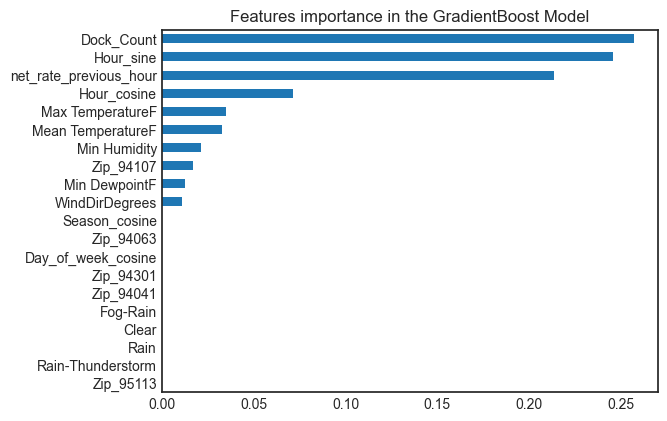

In [218]:

coefs = pd.Series(gbr.feature_importances_, index = X_train.columns)
print("XGBoost picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                       coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Features importance in the GradientBoost Model")
plt.show()

### XGBoost Regressor

In [219]:
## Fitting XGBoost regressor

# nested cross-validation
xgbr = XGBRegressor()

In [220]:
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [221]:
predictions = xgbr.predict(X_test)
print(explained_variance_score(predictions,y_test))

-5.633920305846905


In [222]:
# Root Mean Squared Error
print("RMSE: %.2f"
      % math.sqrt(np.mean((xgbr.predict(X_test) - y_test) ** 2)))

RMSE: 1.66


In [223]:
scoring = 'neg_mean_squared_error'
kfold = KFold(n_splits=5, random_state=seed)
cv_results = cross_val_score(xgbr,
                             X, y,
                             cv=kfold,
                             scoring=scoring)

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.


In [224]:
print('RMSE: %.3f (%.3f)' % (cv_results.mean(), cv_results.std()))

RMSE: -2.803 (0.191)


In [225]:
pred_train = xgbr.predict(X_train)
pred_test  = xgbr.predict(X_test)

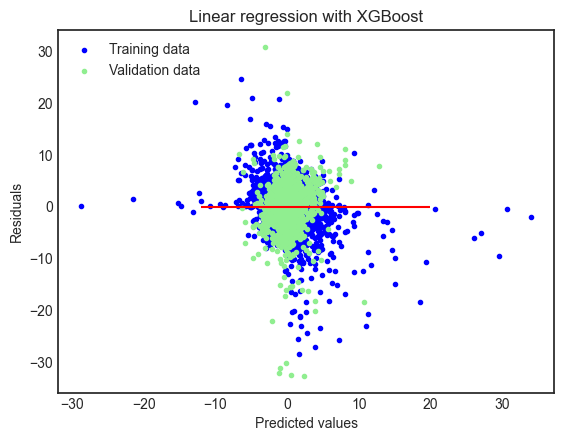

In [226]:

plt.scatter(pred_train, pred_train - y_train, 
            c = "blue", marker = ".", label = "Training data")
plt.scatter(pred_test, pred_test - y_test, 
            c = "lightgreen", marker = ".", label = "Validation data")
plt.title("Linear regression with XGBoost")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = -12, xmax = 20, color = "red")
plt.show()

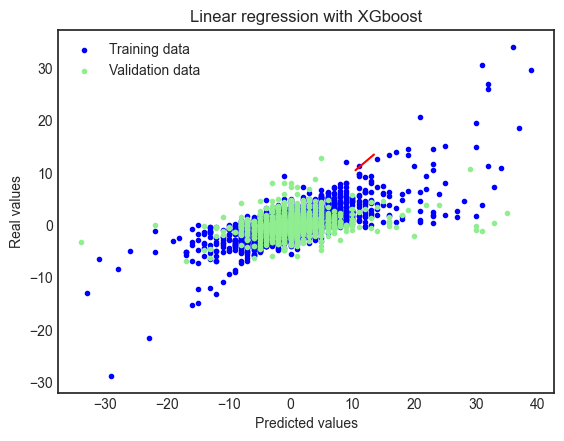

In [227]:

plt.scatter(y_train, pred_train, c = "blue", marker = ".", label = "Training data")
plt.scatter(y_test, pred_test, c = "lightgreen", marker = ".", label = "Validation data")
plt.title("Linear regression with XGboost")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

XGBoost picked 41 features and eliminated the other 0 features


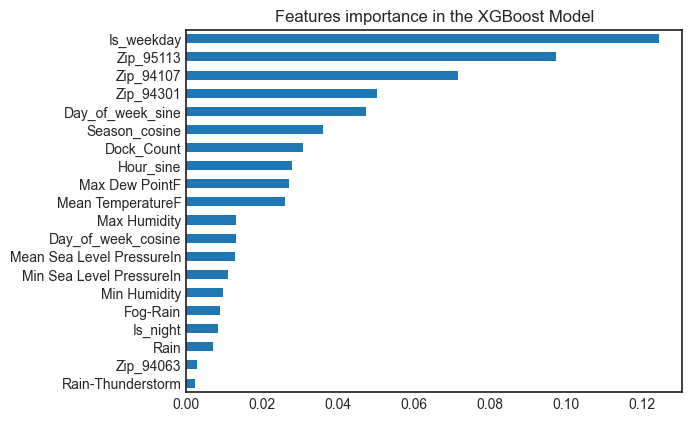

In [228]:
# Важность коэф
coefs = pd.Series(xgbr.feature_importances_, index = X_train.columns)
print("XGBoost picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                       coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Features importance in the XGBoost Model")
plt.show()

#### Regression model comparison

Определяем основную модель для дальнейшей работы

In [229]:
%%time
# подготовка
models = []
models.append(('linear', LinearRegression()))
models.append(('lasso', Lasso()))
models.append(('ridge', Ridge()))
models.append(('elasticnet', ElasticNet()))
models.append(('bayesridge', BayesianRidge()))
models.append(('lars', Lars(n_nonzero_coefs=50)))
models.append(('lassolarsic', LassoLarsIC()))
models.append(('randomforest', RandomForestRegressor()))
models.append(('gradientboost', GradientBoostingRegressor()))
models.append(('xgboost', XGBRegressor()))

# оценка моделей
results = []
names = []
scoring = 'neg_mean_squared_error'

for name, model in models:

    kfold = KFold(n_splits=5, random_state=seed)
    
    cv_results = cross_val_score(model,
                                 X, y,
                                 cv=kfold,
                                 scoring=scoring)
    results.append((-1)*cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, (-1)*cv_results.mean(), cv_results.std())
    print(msg)

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.


linear: 2.803339 (0.147881)


Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.


lasso: 2.799933 (0.149480)


Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.


ridge: 2.803298 (0.147860)


Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.


elasticnet: 2.800021 (0.149418)


Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.


bayesridge: 2.800339 (0.148812)


Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
Regressors in active set degenerate. Dropping a regressor, after 32 iterations, i.e. alpha=4.350e-06, with an active set of 31 regressors, and the smallest cholesky pivot element being 5.475e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 34 iterations, i.e. alpha=2.964e-06, with an active set of 33 regressors, and the smallest cholesky pivot element being 5.475e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 34 iterations, i.e. alpha=2.869e-06, with an active set of 33 regressors, and the smallest cholesky pivot element being 5.475e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 36 iterations, i.e. alpha=1.972e-06, with an a

lars: 2.804478 (0.148423)
lassolarsic: 2.801055 (0.148286)


Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.


randomforest: 2.990155 (0.193671)


Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.


gradientboost: 2.766581 (0.150930)


Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.


xgboost: 2.803065 (0.190925)
Wall time: 9min 45s


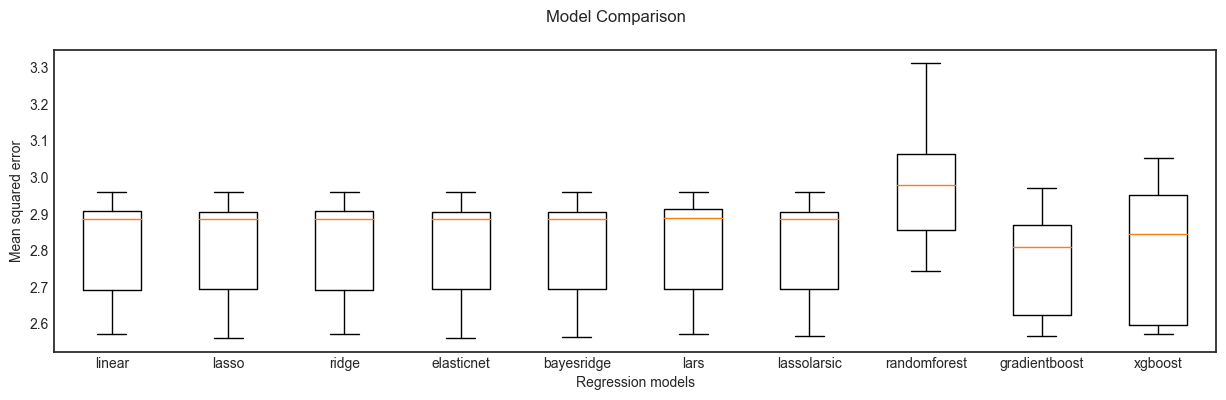

In [230]:
# Выводим boxplot по результатам
fig = plt.figure(figsize=(15,4))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names) 
ax.set_ylabel('Mean squared error')
ax.set_xlabel('Regression models')
plt.show()

### Learning Curves

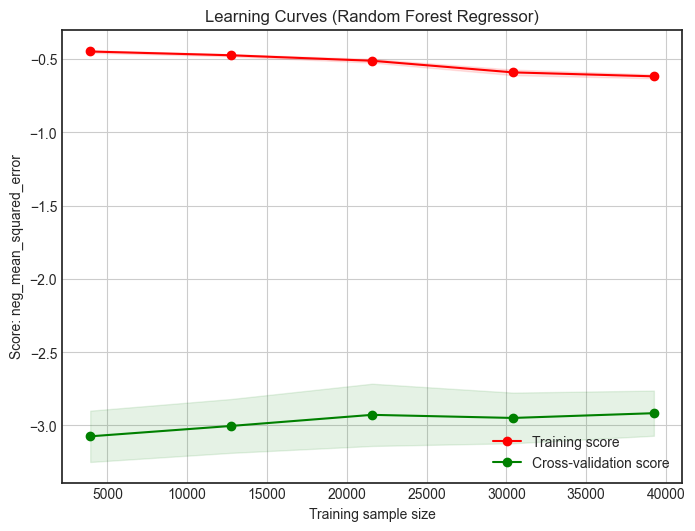

None

In [231]:
#
pipe = make_pipeline(rfr)

title = "Learning Curves (Random Forest Regressor)"

plot_learning_curve(pipe, title, X_train, y_train, 
                    cv=None, 
                    scoring='neg_mean_squared_error', 
                    n_jobs=1,
                    train_sizes=np.linspace(.1, 1.0, 5))

In [241]:
#from sklearn.model_selection import validation_curve
from sklearn import model_selection
## Define validation plots
def validation_curve(estimators, X_train, y_train, param_name,
                     params, param_range, cv=3,
                     scoring="neg_mean_squared_error", logx=False,
                     n_jobs=1):
    """
    Draw histogram of the DataFrame's series comparing the distribution
    in `signal` to `background`.
    Parameters
    ----------
    models : dictionary, shape = [n_models]
    X : DataFrame, shape = [n_samples, n_classes]
    y : DataFrame, shape = [n_classes]
    param_range :
    param_name :
    cv :
    scoring :
    n_jobs :
    Returns
    -------
    plot : matplotlib plot
    """

    """
    Describe possible kwargs values
    Keys
    ----------
    """

    # deep compy of model(s)
    models = estimators

    # line width
    lw = 2

    # check to see if models is a list
    if not isinstance(models, list):
        models = [models]
    # check to see if model is a pipeline object or not
    if isinstance(models[0], sklearn.pipeline.Pipeline):
        data_type = type(models[0]._final_estimator)
    else:
        data_type = type(models[0])

    # plot title
    name = filter(str.isalnum, str(data_type).split(".")[-1])
    title = "Validation Curves (%s)" % name

    # create blank canvas
    fig, ax = plt.subplots(figsize=(8, 6))

    ax.grid(which='major', linestyle='-', linewidth='0.2', color='gray')
    #ax.set_facecolor('white')

    for n, model in enumerate(models):
        print('start validation scores ...')
        #print(model.get_params().keys())
        # validation scores
        print('param_name:', param_name)
        print('param_range:', param_range)
        train_scores, test_scores = model_selection.validation_curve(
            model, X_train, y_train,
            param_name=param_name,
            param_range=param_range, cv=cv,
            scoring=scoring, n_jobs=n_jobs)
        print('end validation scores ...')
        # mean train scores
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std  = np.std(train_scores, axis=1)

        # mean test scores
        test_scores_mean  = np.mean(test_scores, axis=1)
        test_scores_std   = np.std(test_scores, axis=1)

        # extract information for legend
        label = 'placeholder'

        # plot validation curve
        if logx is True:
            plt.semilogx(param_range, train_scores_mean, '--',
                         label=label.replace('placeholder','Training'),
                         color="darkorange", lw=lw)

            plt.semilogx(param_range, test_scores_mean,
                         label=label.replace('placeholder','Test'),
                         color="navy", lw=lw)
        else:
            plt.plot(param_range, train_scores_mean, '--',
                     label=label.replace('placeholder','Training'),
                     color="darkorange", lw=lw)

            plt.plot(param_range, test_scores_mean,
                     label=label.replace('placeholder','Test'),
                     color="navy", lw=lw)

        plt.fill_between(param_range, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.2,
                         color="darkorange", lw=lw)

        plt.fill_between(param_range, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.2,
                         color="navy", lw=lw)

        #colour = test_line[-1].get_color()
        #plt.axvline(x=best_iter, color=colour)

    # plot title
    plt.title(title, fontsize=14)

    plt.xlabel(str(param_name).replace('__',''))
    plt.ylabel(scoring)

    # x-axis range
    plt.xlim([min(param_range), max(param_range)])

    plt.legend(loc='best', frameon=False, fancybox=True, fontsize=12)

    return plt.show()

In [236]:
estimator = RandomForestRegressor(n_jobs=1, criterion='mse', 
                                  min_samples_leaf=10, random_state=seed)
# n_estimators=10,  max_depth=None, criterion=’mse’, min_samples_leaf=1,

start validation scores ...
param_name: n_estimators
param_range: [ 2 10 18 26]
end validation scores ...


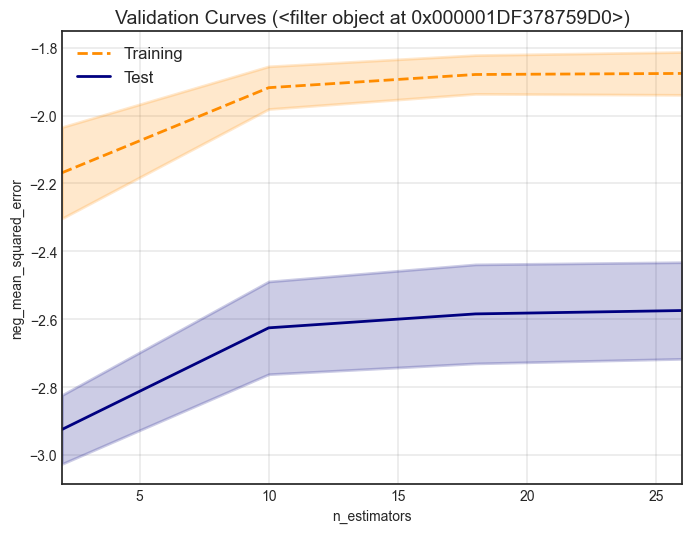

In [242]:
# Гипер - параметры  и валидация
name = 'estimator'#.lower()

#param_name = name+'__alpha'
param_name = 'n_estimators'
param_range = np.linspace(2, 26, num=4, dtype=int)
#params = {name.lower()+'__alpha': 1}
params = {'n_estimators': 1}

validation_curve(estimator,
                 X_train, y_train,
                 param_name,
                 params,
                 param_range,
                 scoring="neg_mean_squared_error",
                 cv=3
                )

start validation scores ...
param_name: max_depth
param_range: [4, 5, 6, 7, 8, 9, 10, 15, 25]
end validation scores ...


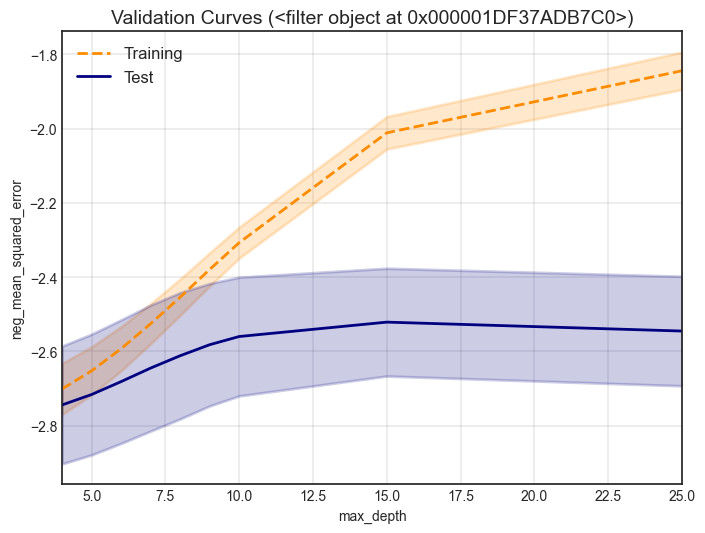

Wall time: 13min 15s


In [243]:
%%time
name = 'estimator'

param_name = 'max_depth'
param_range = [4, 5, 6, 7, 8, 9, 10, 15, 25] #np.linspace(2, 5, num=1, dtype=int)
params = {'max_depth': param_range}

validation_curve(estimators=estimator,
                 X_train=X_train, 
                 y_train=y_train,
                 param_name=param_name,
                 params=params,
                 param_range=param_range,
                 scoring="neg_mean_squared_error",
                 cv=3
                )

start validation scores ...
param_name: min_samples_leaf
param_range: [1, 5, 10, 15]
end validation scores ...


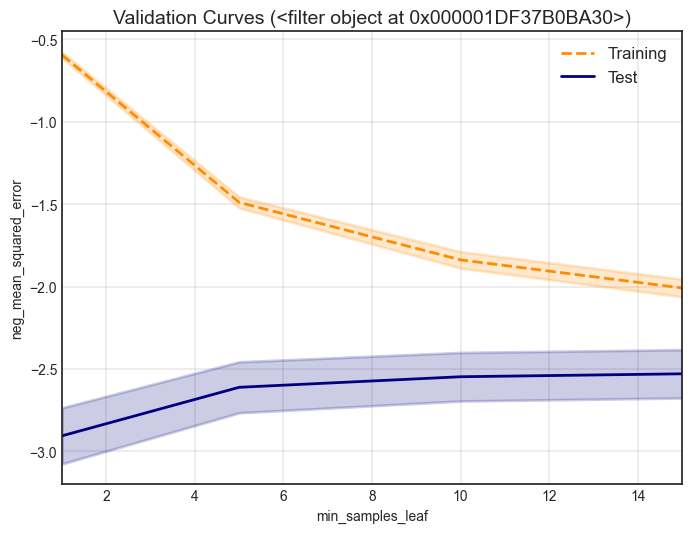

In [244]:
name = 'estimator'

param_name = 'min_samples_leaf'
param_range = [1, 5, 10, 15]#np.linspace(1, 11, num=2, dtype=int)
params = {name.lower()+'min_samples_leaf': 1}

validation_curve(estimator,
                 X_train, y_train,
                 param_name,
                 params,
                 param_range,
                 scoring="neg_mean_squared_error",
                 cv=3
                )

### Model tuning with Bayesian Optimization

In [245]:
 from sklearn.model_selection import StratifiedKFold
    
# кол-во шагов
n_calls = 11

# K-fold stratified cross-validaiton
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)

In [247]:
import skopt
from skopt.utils import use_named_args
from skopt import gp_minimize
from skopt.space import Real, Categorical, Integer

#
space  = [
    Integer(15, 35,                       name='n_estimators'),
    Integer(10, 30,                       name='max_depth'),
    Integer(5,  10,                       name='min_samples_leaf'),
    #Real(10**-3, 9.*10**-1, "log-uniform", name='amma'),
    #Real(10**-3, 9.*10**-1, "log-uniform", name='learning_rate'),   
]

In [248]:
skopt.__version__

'0.8.1'

In [250]:
# декоратор для передаче параметров, как ключевые аргументы 
# используем scikit оболочку

@use_named_args(space)
def objective(**params):

    estimator.set_params(**params)
    
    score = -np.mean(cross_val_score(estimator, 
                                     X, y, #X_train, y_train
                                     cv=3, 
                                     #n_jobs=-1,
                                     scoring="neg_mean_absolute_error"))

    return score

In [251]:
%%time
print('Processing Bayesian optimization...')

# Bayesian optimization
estimator_gp_ei = gp_minimize(func=objective,           # функция минимизации
                              dimensions=space,         # пространство оптимизации
                              acq_func="EI",            # выбор функции ("EI", "LCB", "PI")
                              n_calls=n_calls,          # кол-во итераций
                              random_state=seed,        # seed  
                              #x0=default_parameters,   # базовое значение для помощи поиска
                              n_jobs=1)                 # кол-во потоков

Processing Bayesian optimization...
Wall time: 7min


In [253]:
print("Best score=%.4f (EI)" % estimator_gp_ei.fun)
print("""Expected Improvement (EI) best parameters:
- n_estimators= %s  
- max_depth= %s
- min_samples_leaf= %s """ % (str(estimator_gp_ei.x[0]), str(estimator_gp_ei.x[1]),
                              str(estimator_gp_ei.x[2])))

Best score=0.6019 (EI)
Expected Improvement (EI) best parameters:
- n_estimators= 34  
- max_depth= 10
- min_samples_leaf= 10 


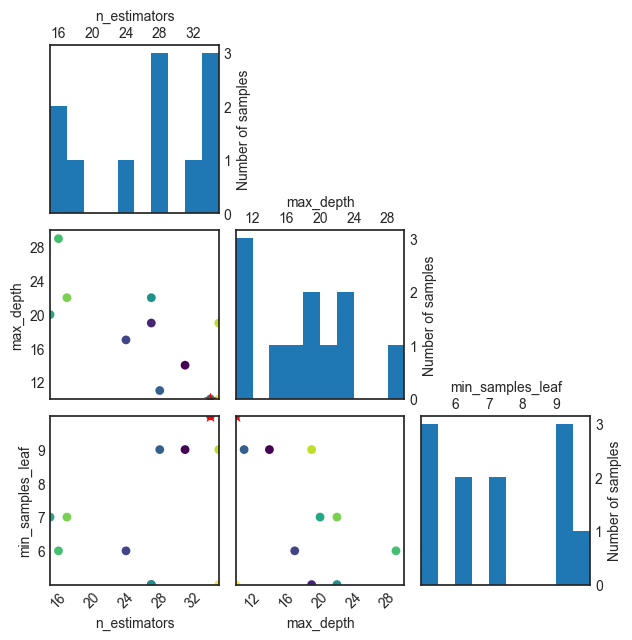

In [254]:
from skopt.plots import plot_evaluations

plot_evaluations(estimator_gp_ei, bins=10, 
                 dimensions=['n_estimators', 'max_depth', 'min_samples_leaf'])
plt.show()

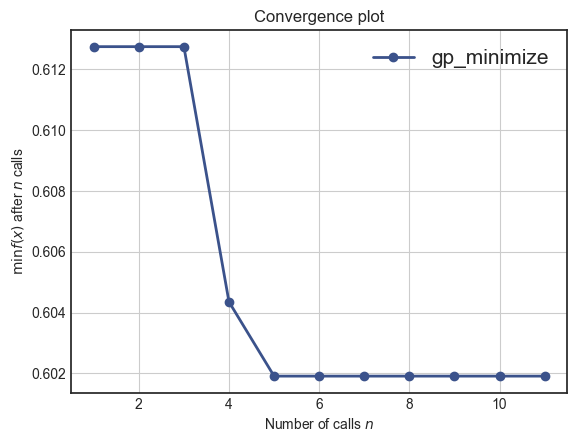

In [255]:
from skopt.plots import plot_convergence

# Сходимость
plot_convergence(("gp_minimize", estimator_gp_ei));
plt.legend(loc="best", prop={'size': 15}, numpoints=1);
plt.show()

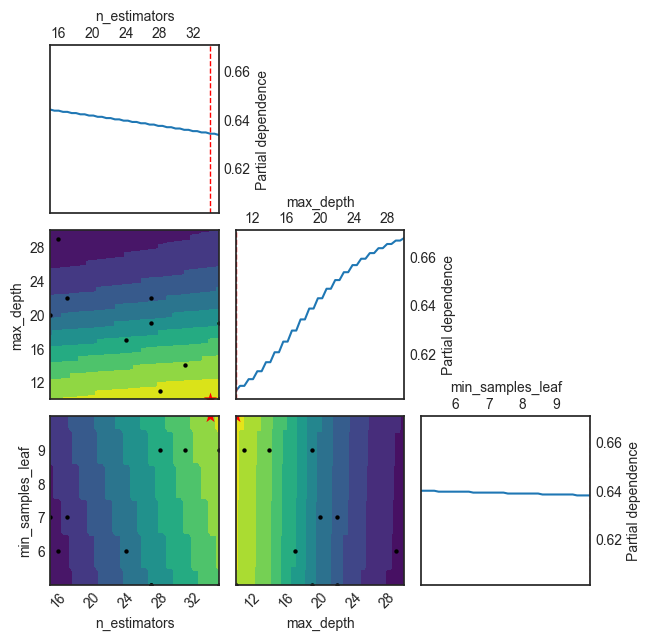

In [256]:
from skopt.plots import plot_objective

plot_objective(estimator_gp_ei)
plt.show()